In [1]:
from PIL import Image  # !pip install pillow
import numpy as np

In [4]:
im = Image.open('bbtor.jpg')
bw = im.convert('L')  # grayscale
bw.size

(1920, 1280)

In [6]:
new_size = bw.size[0] // 4, bw.size[1] // 4
new_size

(480, 320)

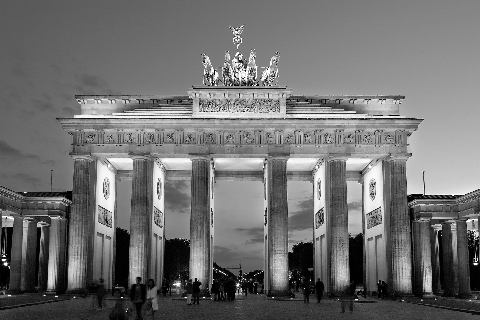

In [8]:
small = bw.resize(new_size)
small

In [13]:
a = np.array(small).astype(np.float64)
a.shape, a.dtype

((320, 480), dtype('float64'))

In [66]:
kernel = np.zeros((5, 5), dtype=np.float64)
kernel[1,:] = -1.0
kernel[2,:] = 2.0
kernel[3,:] = -1.0
horizontal = kernel
horizontal

array([[ 0.,  0.,  0.,  0.,  0.],
       [-1., -1., -1., -1., -1.],
       [ 2.,  2.,  2.,  2.,  2.],
       [-1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [67]:
vertical = kernel.T
vertical

array([[ 0., -1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.,  0.]])

In [68]:
fm_horizontal = []
fm_vertical = []
for y in range(0, a.shape[0] - 4):
    for x in range(0, a.shape[1] - 4):
        dot = (a[y:y+5, x:x+5] * horizontal).sum()
        fm_horizontal.append(dot)
        dot = (a[y:y+5, x:x+5] * vertical).sum()
        fm_vertical.append(dot)

In [71]:
fm_horizontal = np.array(fm_horizontal, dtype=np.float64)
new_shape = (a.shape[0] - 4, a.shape[1] - 4)
new_shape

(316, 476)

In [72]:
fm_vertical = np.array(fm_vertical, dtype=np.float64)
new_shape = (a.shape[0] - 4, a.shape[1] - 4)
new_shape

(316, 476)

In [101]:
fm1 = fm_horizontal.reshape(new_shape)
fm2 = fm_vertical.reshape(new_shape)

In [102]:
fm1 += 120
fm1[fm1 < 0] = 0.0
fm1 = 255 * fm1 / fm1.max()
fm1 = fm1.astype(np.uint8)

fm2 += 120
fm2[fm2 < 0] = 0.0
fm2 = 255 * fm2 / fm2.max()
fm2 = fm2.astype(np.uint8)

In [103]:
fm1.min(), fm1.max()

(62, 255)

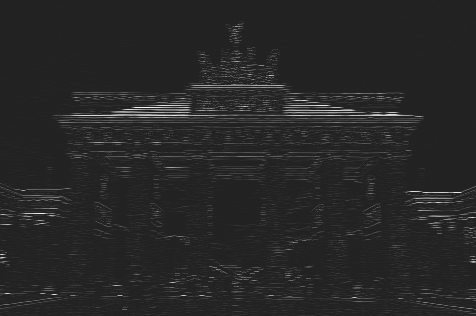

In [95]:
Image.fromarray(fm1, mode='L')

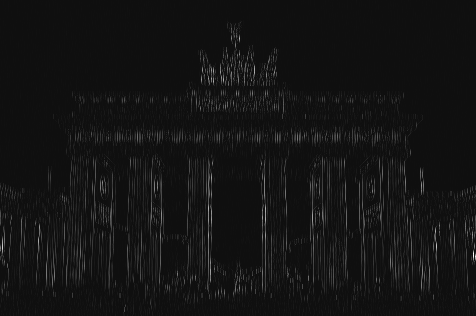

In [96]:
Image.fromarray(fm2, mode='L')

In [108]:
b = np.zeros((new_shape[0], new_shape[1], 3), dtype=np.uint8)
b[:,:,0] = fm1
b[:,:,1] = fm2

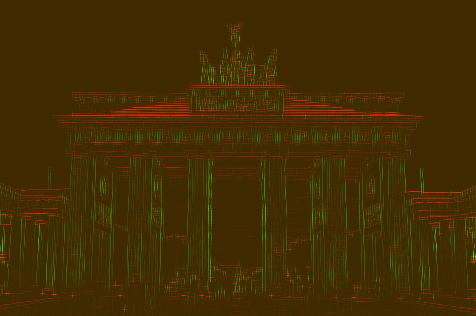

In [110]:
final = Image.fromarray(b, mode='RGB')
final

In [111]:
final.save('redgreen.png')